In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [8]:
train_labels[10]

3

In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
def to_one_hot(labels, dimension=46):
    
    results = np.zeros((len(labels), dimension))
    
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)

one_hot_test_labels = to_one_hot(test_labels)

In [18]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)

one_hot_test_labels = to_categorical(test_labels)

In [19]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 327us/step - loss: 2.6707 - acc: 0.4813 - val_loss: 1.7975 - val_acc: 0.6240
Epoch 2/20
7982/7982 [==============================] - 2s 218us/step - loss: 1.4577 - acc: 0.6924 - val_loss: 1.3351 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 230us/step - loss: 1.0828 - acc: 0.7577 - val_loss: 1.1554 - val_acc: 0.7460
Epoch 4/20
7982/7982 [==============================] - 2s 232us/step - loss: 0.8546 - acc: 0.8175 - val_loss: 1.0469 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 2s 232us/step - loss: 0.6730 - acc: 0.8601 - val_loss: 0.9778 - val_acc: 0.7960
Epoch 6/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.5336 - acc: 0.8910 - val_loss: 0.9496 - val_acc: 0.8070
Epoch 7/20
7982/7982 [==============================] - 2s 232us/step - loss: 0.4281 - a

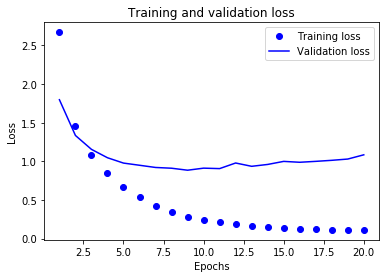

In [28]:
import matplotlib.pyplot as plt
loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

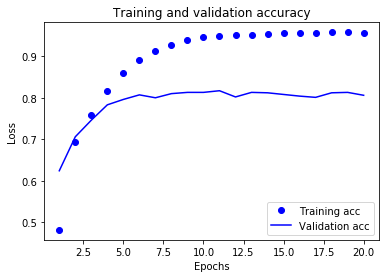

In [30]:
plt.clf()

acc = history.history['acc']

val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

In [31]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=11,batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/11
7982/7982 [==============================] - 2s 305us/step - loss: 2.8037 - acc: 0.4812 - val_loss: 1.8152 - val_acc: 0.6120
Epoch 2/11
7982/7982 [==============================] - 2s 218us/step - loss: 1.4564 - acc: 0.6983 - val_loss: 1.3050 - val_acc: 0.7190
Epoch 3/11
7982/7982 [==============================] - 2s 235us/step - loss: 1.0506 - acc: 0.7742 - val_loss: 1.1318 - val_acc: 0.7590
Epoch 4/11
7982/7982 [==============================] - 2s 234us/step - loss: 0.8165 - acc: 0.8289 - val_loss: 1.0091 - val_acc: 0.7840
Epoch 5/11
7982/7982 [==============================] - 2s 229us/step - loss: 0.6417 - acc: 0.8672 - val_loss: 0.9706 - val_acc: 0.7910
Epoch 6/11
7982/7982 [==============================] - 2s 233us/step - loss: 0.5126 - acc: 0.8945 - val_loss: 0.8947 - val_acc: 0.8120
Epoch 7/11
7982/7982 [==============================] - 2s 229us/step - loss: 0.4149 - acc: 0.9144 - val_loss: 0.8662 - val_acc: 0.8200
